In [1]:
import pandas as pd
import os
import seaborn as sns

In [2]:
transaction_dataset = pd.read_csv(os.path.join(os.getcwd(),"h-and-m-personalized-fashion-recommendations","transactions_train.csv"))
articles_dataset = pd.read_csv(os.path.join(os.getcwd(),"h-and-m-personalized-fashion-recommendations","articles.csv"))
customers_dataset = pd.read_csv(os.path.join(os.getcwd(),"h-and-m-personalized-fashion-recommendations","customers.csv"))

In [3]:
customers_dataset["fashion_news_frequency"].isna().sum()

16009

In [4]:
customers_dataset["club_member_status"].isna().sum()

6062

In [5]:
customers_dataset["Active"].isna().sum()

907576

In [6]:
customers_dataset["FN"].isna().sum()

895050

In [7]:
def count_na_dataset(dataset,dataset_name):
    print(f"NaN values for each column in {dataset_name}")
    for column in dataset.columns:
        print(f"{column} has {dataset[column].isna().sum()} NaN values")

In [8]:
def count_unique_dataset(dataset,dataset_name):
    print(f"Number of unique values in each column of {dataset_name}")
    for column in dataset.columns:
        print(f"{column} has {len(dataset[column].unique())} unique values")

In [9]:
count_na_dataset(transaction_dataset,"Transactions")

NaN values for each column in Transactions
t_dat has 0 NaN values
customer_id has 0 NaN values
article_id has 0 NaN values
price has 0 NaN values
sales_channel_id has 0 NaN values


In [10]:
count_na_dataset(articles_dataset,"Articles")

NaN values for each column in Articles
article_id has 0 NaN values
product_code has 0 NaN values
prod_name has 0 NaN values
product_type_no has 0 NaN values
product_type_name has 0 NaN values
product_group_name has 0 NaN values
graphical_appearance_no has 0 NaN values
graphical_appearance_name has 0 NaN values
colour_group_code has 0 NaN values
colour_group_name has 0 NaN values
perceived_colour_value_id has 0 NaN values
perceived_colour_value_name has 0 NaN values
perceived_colour_master_id has 0 NaN values
perceived_colour_master_name has 0 NaN values
department_no has 0 NaN values
department_name has 0 NaN values
index_code has 0 NaN values
index_name has 0 NaN values
index_group_no has 0 NaN values
index_group_name has 0 NaN values
section_no has 0 NaN values
section_name has 0 NaN values
garment_group_no has 0 NaN values
garment_group_name has 0 NaN values
detail_desc has 416 NaN values


In [11]:
count_na_dataset(customers_dataset,"Customers")

NaN values for each column in Customers
customer_id has 0 NaN values
FN has 895050 NaN values
Active has 907576 NaN values
club_member_status has 6062 NaN values
fashion_news_frequency has 16009 NaN values
age has 15861 NaN values
postal_code has 0 NaN values


In [12]:
customers_dataset["FN"].unique()

array([nan,  1.])

In [13]:
customers_dataset["Active"].unique()

array([nan,  1.])

In [14]:
customers_dataset["club_member_status"].unique()

array(['ACTIVE', nan, 'PRE-CREATE', 'LEFT CLUB'], dtype=object)

In [15]:
customers_dataset["fashion_news_frequency"].unique()

array(['NONE', 'Regularly', nan, 'Monthly', 'None'], dtype=object)

In [16]:
count_unique_dataset(transaction_dataset,"Transactions")

Number of unique values in each column of Transactions
t_dat has 734 unique values
customer_id has 1362281 unique values
article_id has 104547 unique values
price has 9857 unique values
sales_channel_id has 2 unique values


In [17]:
count_unique_dataset(articles_dataset,"Articles")

Number of unique values in each column of Articles
article_id has 105542 unique values
product_code has 47224 unique values
prod_name has 45875 unique values
product_type_no has 132 unique values
product_type_name has 131 unique values
product_group_name has 19 unique values
graphical_appearance_no has 30 unique values
graphical_appearance_name has 30 unique values
colour_group_code has 50 unique values
colour_group_name has 50 unique values
perceived_colour_value_id has 8 unique values
perceived_colour_value_name has 8 unique values
perceived_colour_master_id has 20 unique values
perceived_colour_master_name has 20 unique values
department_no has 299 unique values
department_name has 250 unique values
index_code has 10 unique values
index_name has 10 unique values
index_group_no has 5 unique values
index_group_name has 5 unique values
section_no has 57 unique values
section_name has 56 unique values
garment_group_no has 21 unique values
garment_group_name has 21 unique values
detail_d

In [18]:
count_unique_dataset(customers_dataset,"Customers")

Number of unique values in each column of Customers
customer_id has 1371980 unique values
FN has 2 unique values
Active has 2 unique values
club_member_status has 4 unique values
fashion_news_frequency has 5 unique values
age has 85 unique values
postal_code has 352899 unique values


In [19]:
temp_dataset = transaction_dataset.join(articles_dataset,on="article_id",lsuffix="_caller", rsuffix="_other",how="outer")

In [20]:
main_dataset = temp_dataset.merge(customers_dataset,on="customer_id",how="outer")

In [ ]:
main_dataset.head

<bound method NDFrame.head of            article_id       t_dat  \
0         663713001.0  2018-09-20   
1         663713001.0  2018-09-24   
2         541518023.0  2018-09-20   
3         578020002.0  2019-03-01   
4         351484002.0  2020-02-03   
...               ...         ...   
31903560          NaN         NaN   
31903561          NaN         NaN   
31903562          NaN         NaN   
31903563          NaN         NaN   
31903564          NaN         NaN   

                                                customer_id  \
0         000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
1         000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
2         000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
3         000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
4         000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
...                                                     ...   
31903560  ffe5801cb2a5b51d4d068322d7f8082e995f427a6f22a6...   
31903561  ffeb3ca867a

In [ ]:
#main_dataset.to_csv("main_dataset.csv")

In [ ]:
main_dataset_copy=main_dataset.copy()

In [ ]:
main_dataset_copy.drop(columns=["detail_desc","product_code","postal_code","prod_name","graphical_appearance_name","colour_group_name"])

,article_id,t_dat,customer_id,article_id_caller,price,sales_channel_id,article_id_other,product_type_no,product_type_name,product_group_name,...,index_group_name,section_no,section_name,garment_group_no,garment_group_name,FN,Active,club_member_status,fashion_news_frequency,age
0,663713001.0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001.0,0.050831,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACTIVE,NONE,24.0
1,663713001.0,2018-09-24,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001.0,0.050831,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACTIVE,NONE,24.0
2,541518023.0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023.0,0.030492,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACTIVE,NONE,24.0
3,578020002.0,2019-03-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,578020002.0,0.013542,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACTIVE,NONE,24.0
4,351484002.0,2020-02-03,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,351484002.0,0.022017,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACTIVE,NONE,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31903560,NaN,NaN,ffe5801cb2a5b51d4d068322d7f8082e995f427a6f22a6...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACTIVE,NONE,55.0
31903561,NaN,NaN,ffeb3ca867aba57a312fe9d28d67dd46ef2240fe92a94c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,ACTIVE,Regularly,21.0
31903562,NaN,NaN,fff456fa60aac9174456c2f36ede5e0f25429a16c88a34...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PRE-CREATE,NONE,40.0
31903563,NaN,NaN,fffa8d3cea26d4f5186472b923629b35fa28051f258030...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,ACTIVE,Regularly,21.0


<AxesSubplot:>

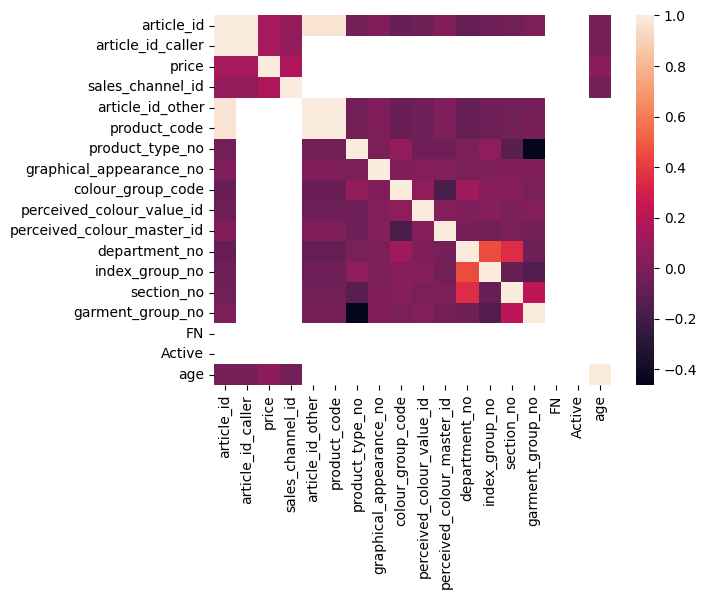

In [ ]:
corrM = main_dataset_copy.corr()
sns.heatmap(corrM)

In [ ]:
#def customer_transaction_dataset(customer_id,customer_specific_folders_path):
#    customer_dataset = transaction_dataset.loc[transaction_dataset['customer_id'] == customer_id]
#    customer_specific_folder_path = os.path.join(customer_specific_folders_path,customer_id)
#    os.mkdir(customer_specific_folder_path)
#    customer_dataset.to_csv(os.path.join(customer_specific_folder_path,"customer_dataset.csv"))

In [ ]:
#customer_specific_folders_path = os.path.join(os.getcwd(),"h-and-m-personalized-fashion-recommendations","customer_specific_folders")
#os.mkdir(customer_specific_folders_path)
#for customer_id in transaction_dataset["customer_id"].unique():
#    customer_transaction_dataset(customer_id,customer_specific_folders_path)